In [203]:
import pandas as pd
import numpy  as np
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [54]:
house = pd.read_csv('HousePrice.csv')
house.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
0,5/2/14 0:00,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0
1,5/2/14 0:00,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0
2,5/2/14 0:00,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0
3,5/2/14 0:00,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,420000.0
4,5/2/14 0:00,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,550000.0


In [55]:
target  =  house['SalesPrice']
feature =  house.drop('SalesPrice',axis=  1)

In [56]:
feature.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated'
this are the features and  SalesPrice is the target variable 

In [57]:
house.shape

(4600, 14)

In [58]:
house.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
SalesPrice       0
dtype: int64

there are 4600 records and there are no missing values 

In [59]:
house.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
count,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.519630e+05
std,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,5.638347e+05
min,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,3.228750e+05
50%,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,4.609435e+05
75%,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,6.549625e+05
max,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2.659000e+07


Text(0.5, 0, 'sqft living')

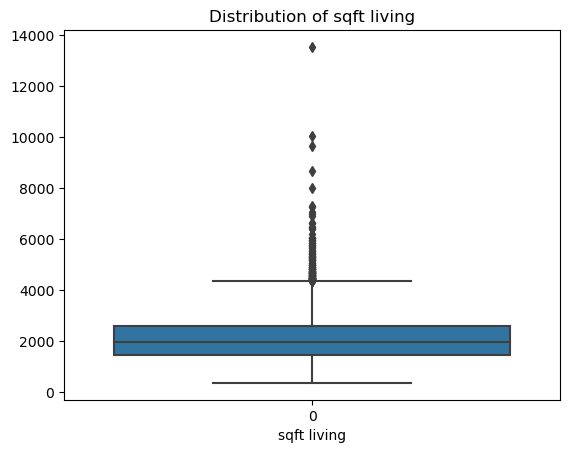

In [60]:
sns.boxplot(house['sqft_living'])
plt.title("Distribution of sqft living")
plt.xlabel('sqft living')


Text(0.5, 0, 'sqft lot')

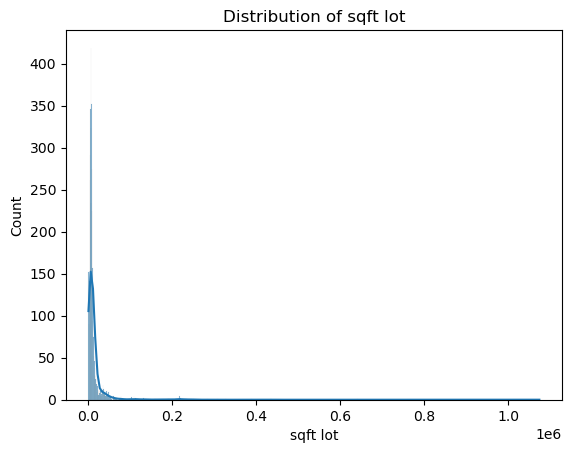

In [61]:
sns.histplot(house['sqft_lot'],kde=True)
plt.title("Distribution of sqft lot")
plt.xlabel('sqft lot')

Text(0.5, 0, 'floors')

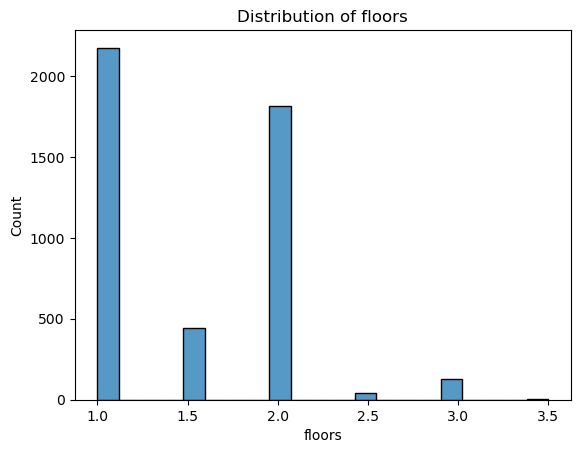

In [62]:
sns.histplot(house,x = 'floors')
plt.title("Distribution of floors")
plt.xlabel('floors')

Text(0.5, 0, 'SalesPrice')

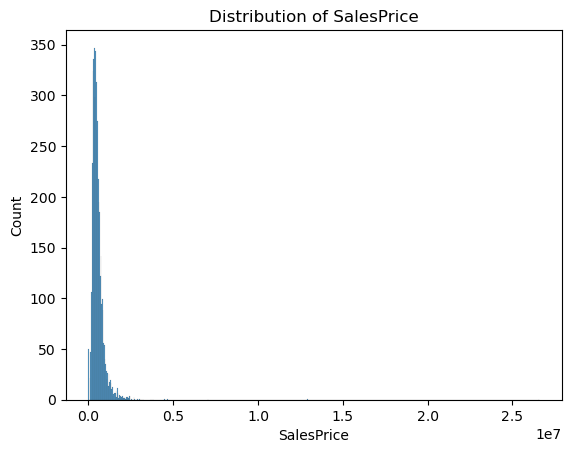

In [63]:
sns.histplot(house,x = 'SalesPrice')
plt.title("Distribution of SalesPrice")
plt.xlabel('SalesPrice')

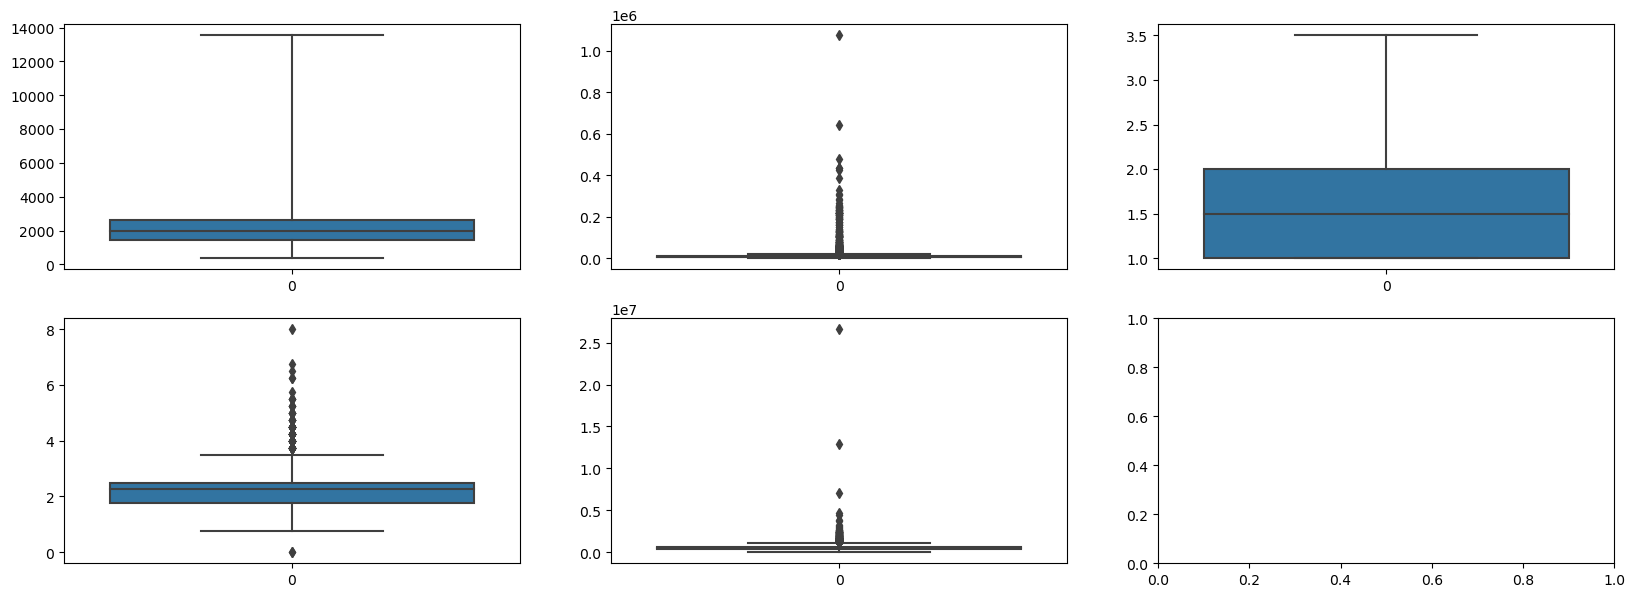

In [64]:
fig, axs = plt.subplots(2,3,figsize = (20,7))
plt1 = sns.boxplot(house['sqft_living'] , whis= 100000,ax = axs[0,0])
plt2 = sns.boxplot(house['sqft_lot'], ax = axs[0,1])
plt3 = sns.boxplot(house['floors'], ax = axs[0,2])
plt1 = sns.boxplot(house['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house['SalesPrice'], ax = axs[1,1])

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test  = train_test_split(house['sqft_lot'],house['SalesPrice'],random_state=45)

# as we have only 1 feature so we need to rehape it 
x_train = x_train.to_numpy()
x_train = x_train.reshape(-1,1)

x_test = x_test.to_numpy()
x_test = x_test.reshape(-1,1)

model  = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [66]:
coef = pd.DataFrame(model.coef_,['SalesPrice'],columns=['Coefficient'])
coef

,Coefficient
SalesPrice,0.787479


In [67]:
intercept = pd.DataFrame(model.intercept_,['SalesPrice'],columns=['Intercept'])
intercept

,Intercept
SalesPrice,547480.597128


In [68]:

y_pred = model.predict(x_train)

errors = np.square(np.subtract(y_train, y_pred))

# Sum the errors
sum_of_errors = np.sum(errors)

print ("sum_of_errors is {}".format(sum_of_errors))

sum_of_errors is 1331318910998174.8


# Implement your own linear regression model using the "sqft_lot" feature as the independent variable and "SalePrice" as the target variable. Print coef and intercept.

In [147]:
X = house['sqft_lot'].values
y = house['SalesPrice'].values

In [151]:
def LinearRegression(X, y):
    # Calculate the mean of X and y
    mean_X = np.mean(X)
    mean_y = np.mean(y)

    # Calculate the slope (coef)
    numerator = np.sum((X - mean_X) * (y - mean_y))
    denominator = np.sum((X - mean_X) ** 2)
    slope = numerator / denominator

    # Calculate the intercept
    intercept = mean_y - slope * mean_X

    return slope, intercept

# Fit the linear regression model
coef, intercept = LinearRegression(X, y)

# Print coefficients and intercept
print(f"Coefficients for linear regression model are {coef}")
print(f"Intercepts for the linear regression model are {intercept}")

Coefficients for linear regression model are 0.7927166756315327
Intercepts for the linear regression model are 540189.1512958274


In [153]:
# Predicted values using the linear regression model
y_pred = coef * X + intercept

# Calculate the sum of squares
sum_of_squares = np.sum((y - y_pred) ** 2)

# Print the sum of squares
print("Sum of Squares (SSE):", sum_of_squares)

Sum of Squares (SSE): 1458344675295682.8


# Alternate method 

In [77]:
squarefoot= house['sqft_lot'].values.reshape(-1, 1)
Sales= house['SalesPrice'].values

# Linear regression model
X = np.concatenate([np.ones_like(squarefoot), squarefoot], axis=1)  # Adding a column of ones for X
y =Sales

# Calculating coefficients using the normal equation
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
intercept, slope = coefficients[0], coefficients[1]

# Printing coefficients and intercept
print(f"Coefficient of the linear regression model is : {slope}")
print(f"Intercept of the linear regression models is : {intercept}")

Coefficient of the linear regression model is : 0.7927166756315324
Intercept of the linear regression models is : 540189.1512958275


# Calculate the sum of squared errors for your model.

In [78]:
# Calculating the sum of squared errors
predictions = X @ coefficients
sse = np.sum((y - predictions) ** 2)
print("Sum of Squared Errors:", sse)

Sum of Squared Errors: 1458344675295682.8


# Plot the regression line along with the actual data points.

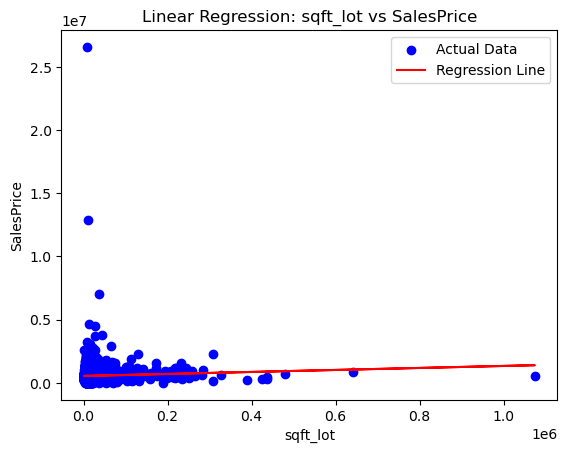

In [80]:
plt.scatter(squarefoot, Sales, label="Actual Data", color='blue')
plt.plot(squarefoot, predictions, color='red', label="Regression Line")
plt.xlabel("sqft_lot")
plt.ylabel("SalesPrice")
plt.title("Linear Regression: sqft_lot vs SalesPrice")
plt.legend()
plt.show()

# Use the LinearRegression function from sklearn.linear_model library and compare the coef and intercept with your model.

In [155]:
X = house[['sqft_lot']]
y = house['SalesPrice']

In [156]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [157]:
lm.fit(X,Y)

LinearRegression()

In [158]:
print(lm.intercept_)

540189.1512958274


In [159]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
sqft_lot,0.792717


Linear Regression (Multivariate)

# Use the LinearRegression function from sklearn.linear_model library to include multiple features sqft_living, sqft_lot and print the coef and intercept.

In [178]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X = house[['sqft_living', 'sqft_lot']]
y = house['SalesPrice']

multi_features_model = LinearRegression()
multi_features_model.fit(X, y)

coef_multi_features = multi_features_model.coef_
intercept_multi_features = multi_features_model.intercept_

print(f"Coefficient values for sqft living and sqft lot is {coef_multi_features}")
print(f"Intercept value for multivariate linear regression is {intercept_multi_features}")

Coefficient values for sqft living and sqft lot is [257.13000008  -0.66039049]
Intercept value for multivariate linear regression is 11681.165815587505


In [186]:
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"(R²) score for multivariate linear regression model is : {r2}")

(R²) score for multivariate linear regression model is : 0.1869409742537571


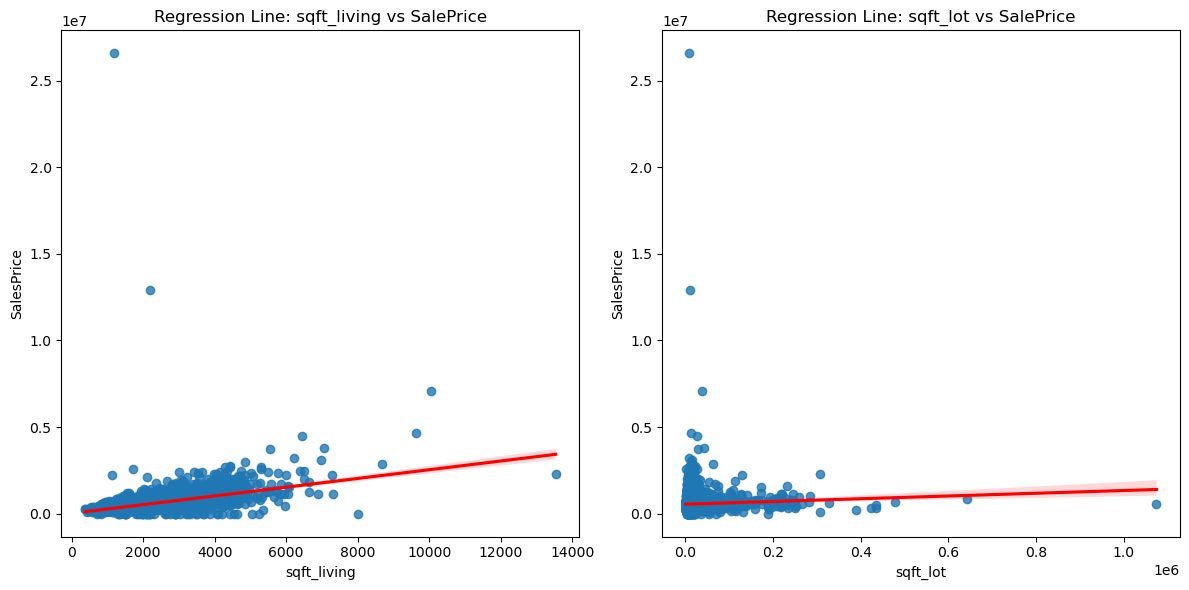

In [202]:
plt.figure(figsize=(12, 6))

# Regression line for 'sqft_living'
plt.subplot(1, 2, 1)
sns.regplot(x='sqft_living', y='SalesPrice', data=house ,line_kws={"color": "red"})
plt.title('Regression Line: sqft_living vs SalePrice')

# Regression line for 'sqft_lot'
plt.subplot(1, 2, 2)
sns.regplot(x='sqft_lot', y='SalesPrice', data=house , line_kws={"color": "red"})
plt.title('Regression Line: sqft_lot vs SalePrice')

plt.tight_layout()
plt.show()

In [205]:
poly_X = house[['sqft_lot']]
poly_y = house['SalesPrice']

# Applying polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(poly_X)

# Creating a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Task 14: Print R-squared (R²) score
y_poly_pred = poly_model.predict(X_poly)
r2_poly = r2_score(y, y_poly_pred)
print("R-squared (R²) score for degree 2:", r2_poly)

R-squared (R²) score for degree 2: 0.00446670543314398
